In [16]:
import sqlalchemy 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, MetaData, inspect, func, Column, Integer, String, Numeric, Text, Float

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables.
# All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.
# Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.
# Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
# Use SQLAlchemy create_engine to connect to your sqlite database.
# Use SQLAlchemy automap_base() to reflect your tables into classes
#and save a reference to those classes called Station and Measurement.




In [8]:

# Use SQLAlchemy create_engine to connect to your sqlite database.
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
conn = engine.connect()

In [9]:


# Use SQLAlchemy automap_base() to reflect your tables into classes
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save reference to the table
Measurement = Base.classes.measurement

Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)


In [14]:
# Design a query to retrieve the last 12 months of precipitation data.
# Select only the date and prcp values.

#ADD THE LAST 12 MONTHS HERE 

# Load the query results into a Pandas DataFrame and set the index to the date column.
# Plot the results using the DataFrame plot method.

year_ago = dt.date.today() - dt.timedelta(days =365)


prcp = session.query(Measurement.date, Measurement.prcp).\
                                  filter(Measurement.date >year_ago).\
                                   order_by(Measurement.date.desc()).all()

prcp_df = pd.DataFrame(prcp)
prcp_df.set_index('date', inplace=True)

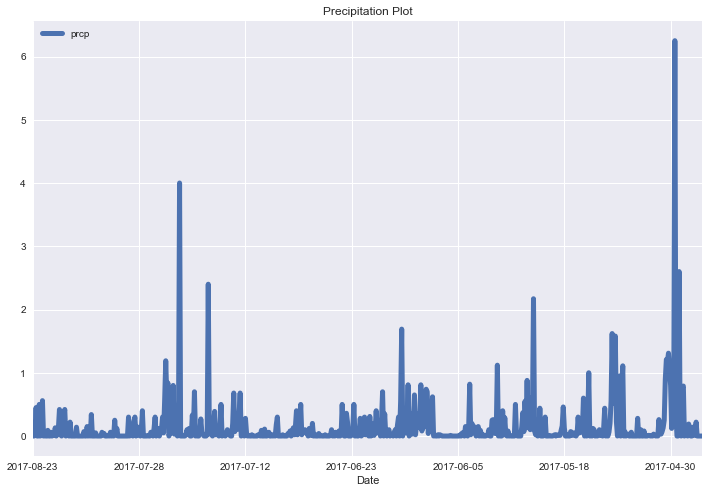

In [17]:
sns.set()
prcp_df.plot(use_index=True, figsize = (12,8), grid=True, title = 'Precipitation Plot', kind = 'line',linewidth = 5)
plt.xlabel('Date')
plt.show()

In [18]:
prcp_df.describe()

,prcp
count,631.000000
mean,0.149287
std,0.404491
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,6.250000


In [19]:
# Station Analysis
# Design a query to calculate the total number of stations.
session.query(Station.station).count()


9

In [20]:

# Design a query to find the most active stations.
# List the stations and observation counts in descending order

session.query(Measurement.station, func.count(Measurement.station).label('Total_observation')).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()






[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [28]:


# Which station has the highest number of observations?

best_station = session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

best_station


('USC00519281')

In [31]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.
# Plot the results as a histogram with bins=12.

tobs = session.query(Measurement.tobs).\
                               filter(Measurement.date > year_ago).\
                                filter(Measurement.station == best_station.station).all()
        
tobs

[(72),
 (74),
 (70),
 (67),
 (72),
 (60),
 (65),
 (75),
 (70),
 (75),
 (70),
 (79),
 (75),
 (70),
 (67),
 (74),
 (70),
 (75),
 (76),
 (77),
 (74),
 (74),
 (74),
 (69),
 (68),
 (76),
 (74),
 (71),
 (71),
 (74),
 (74),
 (74),
 (74),
 (80),
 (74),
 (72),
 (75),
 (80),
 (76),
 (76),
 (77),
 (75),
 (75),
 (75),
 (75),
 (72),
 (74),
 (74),
 (74),
 (76),
 (74),
 (75),
 (73),
 (79),
 (75),
 (72),
 (72),
 (74),
 (72),
 (72),
 (77),
 (71),
 (73),
 (76),
 (77),
 (76),
 (76),
 (79),
 (81),
 (76),
 (78),
 (77),
 (74),
 (75),
 (78),
 (78),
 (69),
 (72),
 (74),
 (74),
 (76),
 (80),
 (80),
 (76),
 (76),
 (76),
 (77),
 (77),
 (77),
 (82),
 (75),
 (77),
 (75),
 (76),
 (81),
 (82),
 (81),
 (76),
 (77),
 (82),
 (83),
 (77),
 (77),
 (77),
 (76),
 (76),
 (79)]

In [32]:
tobs_df = pd.DataFrame(tobs)

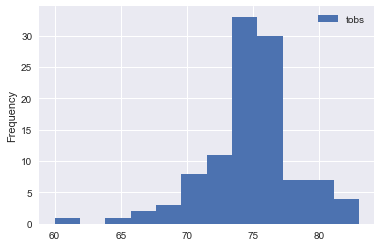

In [33]:
tobs_df.plot.hist(bins=12)
plt.show()

In [38]:
def calc_temps(start_date, end_date):
   
   avg_temp = session.query(func.avg(Measurement.tobs)).\
                                                filter((Measurement.date< end_date)&(Measurement.date>start_date)).all()
   min_temp = session.query(func.min(Measurement.tobs)).\
                                                filter((Measurement.date< end_date)&(Measurement.date>start_date)).all()
   max_temp = session.query(func.max(Measurement.tobs)).\
                                                filter((Measurement.date< end_date)&(Measurement.date>start_date)).all()
   return avg_temp, min_temp, max_temp

In [39]:
start_date = '2017-06-01'
end_date = '2017-06-05'
calc_temps(start_date, end_date)

([(78.1875)], [(76)], [(81)])